# Health Insurance Lead Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [50]:
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [52]:
# Checking for missing data
pd.DataFrame({
    "Train Set":train_data.isnull().sum()/train_data.shape[0]*100,
    "Test Set":test_data.isnull().sum()/test_data.shape[0]*100,
    "Data Type":train_data.dtypes
})

,Train Set,Test Set,Data Type
Accomodation_Type,0.000000,0.000000,object
City_Code,0.000000,0.000000,object
Health Indicator,22.976691,23.054345,object
Holding_Policy_Duration,39.799929,39.454254,object
Holding_Policy_Type,39.799929,39.454254,float64
ID,0.000000,0.000000,int64
Is_Spouse,0.000000,0.000000,object
Lower_Age,0.000000,0.000000,int64
Reco_Insurance_Type,0.000000,0.000000,object
Reco_Policy_Cat,0.000000,0.000000,int64


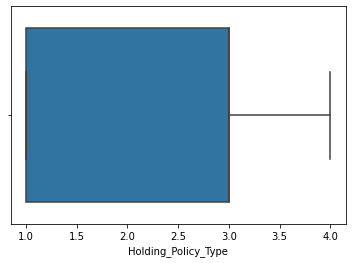

In [53]:
sns.boxplot("Holding_Policy_Type",data=train_data)

In [54]:
# Doing mean imputation for numerical data and mode imputation for categorical data
train_data['Holding_Policy_Type'] = train_data['Holding_Policy_Type'].fillna(train_data['Holding_Policy_Type'].mean())
test_data['Holding_Policy_Type'] = test_data['Holding_Policy_Type'].fillna(test_data['Holding_Policy_Type'].mean())

# Mode imputation
train_data = train_data.fillna(train_data.mode().iloc[0])
test_data = test_data.fillna(test_data.mode().iloc[0])

In [55]:
# Checking for missing data
pd.DataFrame({
    "Train Set":train_data.isnull().sum()/train_data.shape[0]*100,
    "Test Set":test_data.isnull().sum()/test_data.shape[0]*100,
    "Data Type":train_data.dtypes
})

,Train Set,Test Set,Data Type
Accomodation_Type,0.0,0.0,object
City_Code,0.0,0.0,object
Health Indicator,0.0,0.0,object
Holding_Policy_Duration,0.0,0.0,object
Holding_Policy_Type,0.0,0.0,float64
ID,0.0,0.0,int64
Is_Spouse,0.0,0.0,object
Lower_Age,0.0,0.0,int64
Reco_Insurance_Type,0.0,0.0,object
Reco_Policy_Cat,0.0,0.0,int64


In [56]:
train_data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,0.795995,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,2.439228,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


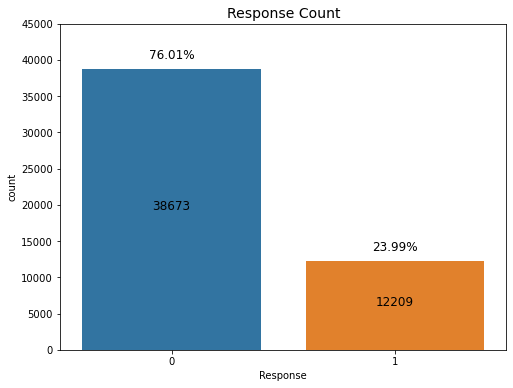

In [130]:
# Count plot of the final predictions
plt.figure(figsize=(8,6))
plt.title("Response Count",fontsize=14)
plt.xlabel("Response")
plt.ylim(0,45000)
ax=sns.countplot(train_data.Response)
# ax.set_xticklabels(['No Default','Default'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+1500,
            '{:1.2f}%'.format(height*100/len(train_data.Response)),
            ha="center",size=12) 
    ax.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.0f}'.format(height),
            ha="center",size=12)
# plt.savefig("No of Loan Defaults in Test Set")

In [57]:
# Data description of object columns
train_data.describe(include=['O'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,50882,50882
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,24701,24750


In [58]:
train_data['City_Code'].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [59]:
train_data['Health Indicator'].value_counts()

X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [60]:
train_data['Holding_Policy_Duration'].value_counts()

1.0     24750
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [61]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data[['City_Code','Health Indicator','Holding_Policy_Duration']]=train_data[['City_Code','Health Indicator','Holding_Policy_Duration']].apply(le.fit_transform)

In [62]:
# Getting dummies
train_data = pd.get_dummies(train_data,drop_first=True)

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         50882 non-null  int64  
 1   City_Code                  50882 non-null  int32  
 2   Region_Code                50882 non-null  int64  
 3   Upper_Age                  50882 non-null  int64  
 4   Lower_Age                  50882 non-null  int64  
 5   Health Indicator           50882 non-null  int32  
 6   Holding_Policy_Duration    50882 non-null  int32  
 7   Holding_Policy_Type        50882 non-null  float64
 8   Reco_Policy_Cat            50882 non-null  int64  
 9   Reco_Policy_Premium        50882 non-null  float64
 10  Response                   50882 non-null  int64  
 11  Accomodation_Type_Rented   50882 non-null  uint8  
 12  Reco_Insurance_Type_Joint  50882 non-null  uint8  
 13  Is_Spouse_Yes              50882 non-null  uin

In [115]:
# Getting predictor and target variables
X = train_data.drop(['Response','City_Code','Region_Code'],axis=1)
y = train_data['Response']

In [116]:
# Data normalization
from sklearn.preprocessing import normalize
X = normalize(X)

In [117]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

In [119]:
models = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
          AdaBoostClassifier(),XGBClassifier()]
model_cross_val = {}
for model in models:
    accuracies = cross_val_score(model,X_train,y_train,cv=KFold(n_splits=10),n_jobs=-1,verbose=10)
    model_cross_val[str(model)[:-2]] = accuracies

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0517s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.4s

KeyboardInterrupt: 

In [ ]:
# Making data frame of accuracies
model_cross_val_df = pd.DataFrame(model_cross_val)
model_cross_val_df.head()

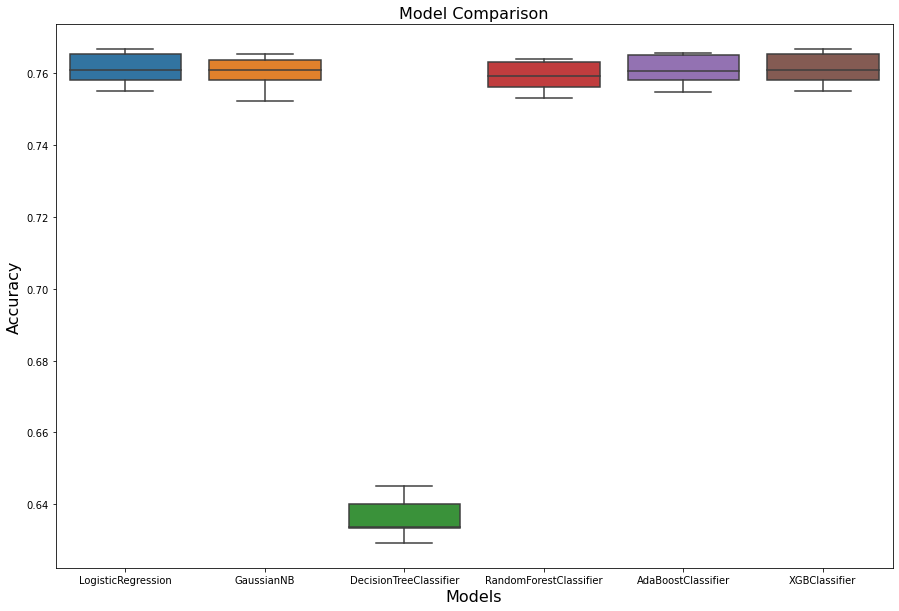

In [75]:
# Making Box Plot of Accuracy
plt.figure(figsize=(15,10))
sns.boxplot(data=model_cross_val_df)
plt.title("Model Comparison",fontsize=16)
plt.xlabel("Models",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.savefig('Model Comparison')

In [76]:
# Mean of accuracies
model_cross_val_df.mean()

LogisticRegression        0.761209
GaussianNB                0.760201
DecisionTreeClassifier    0.636384
RandomForestClassifier    0.759047
AdaBoostClassifier        0.760766
XGBClassifier             0.761184
dtype: float64

In [120]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
pred_prob = model.predict_proba(X_test)

In [122]:
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,roc_curve
print("ROC AUC Score:",roc_auc_score(y_test,pred_prob[:,1]))
print("Classification Report:\n",classification_report(y_test,preds))
print("Confusion Matrix:\n",confusion_matrix(y_test,preds))

ROC AUC Score: 0.5491251778376365
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      7688
           1       0.27      0.28      0.27      2489

    accuracy                           0.64     10177
   macro avg       0.51      0.52      0.52     10177
weighted avg       0.64      0.64      0.64     10177

Confusion Matrix:
 [[5777 1911]
 [1794  695]]


In [123]:
tpr,fpr,thres = roc_curve(y_test,pred_prob[:,1])

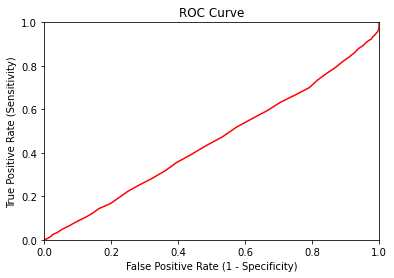

In [124]:
plt.figure()
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.plot(fpr,tpr,color = 'red')